<a href="https://colab.research.google.com/github/isshiki/MLnotebooks/blob/master/How_to_autograd_by_TensorFlow_or_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Masahiko Isshiki - https://blog.masahiko.info/.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 「TensorFlowやPyTorchで自動微分して勾配を取得する方法」

## ■準備

### ●Pythonバージョン：3.x

In [0]:
import sys
print('Python', sys.version)
# Python 3.6.9 (default, Nov  7 2019, 10:44:02)  …… などと表示される

Python 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


### ●TensorFlowバージョン

In [0]:
# Google Colabで最新の2.xを使う場合、2.xに切り替える（Colab専用）
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 2.1.0 ……などと表示される

TensorFlow 2.1.0


### ●PyTorchバージョン

In [0]:
import torch
print('PyTorch', torch.__version__)
# PyTorch 1.4.0 ……などと表示される

PyTorch 1.4.0


## ■実装方法

### ●例として使う計算式

  $$
  y=2x^3+4x^2+5x+6
  $$


#### ○これをPythonの式にすると...

In [0]:
def calc(x):
  return (2 * x ** 3) + (4 * x ** 2) + (5 * x) + 6

### ●微分する導関数の式は...

$$
\frac{dy}{dx}=6x^2+8x+5
$$

#### ○これをPythonの式にすると...

In [0]:
def der_calc(x):
  return (6 * x ** 2) + (8 * x) + 5

### ●導関数に$x=0.5$を入力すると...

$$
\begin{align}
\frac{dy}{dx}&=6\times(0.5)^2+8\times(0.5)+5 \\
&=(6\times0.25)+(8\times0.5)+5 \\
&=1.5+4+5 \\
&=10.5
\end{align}
$$

#### ○Pythonのコードで計算すると...

In [0]:
result = der_calc(0.5)
result # 10.5

10.5

$10.5$が出力される。これと同じことをPyTorchとTensorFlowの自動微分機能を使って行う方法を紹介する。

## ■PyTorch編

- データをPyTorchテンソル化して、計算式を作る
- `backward`メソッドで逆伝播する（自動微分）
- データ（テンソル）の`grad`変数で微分係数（＝勾配）を取得できる

という流れで書けばよい。具体的には以下の通り。

In [0]:
import torch
import torch.nn as nn  # 「ニューラルネットワーク」モジュールの別名定義

x = torch.tensor(0.5, requires_grad=True)  # 変数に対して「勾配計算が必要」とマーク
y = calc(x)    # 既存の計算式から計算グラフを動的に構築
print(y)       # tensor(9.7500, grad_fn=<AddBackward0>) ……などと表示される

y.backward()   # 逆伝播の処理として、上記式から微分係数（＝勾配）を計算（自動微分：Autograd）
g = x.grad     # 与えられた入力（x）によって計算された勾配の値（grad）を取得
print(g)       # tensor(10.5000)  ……などと表示される

tensor(9.7500, grad_fn=<AddBackward0>)
tensor(10.5000)


### ●グラフを描画

先ほどは単一のスカラーだったので、今度は複数のスカラー値で計算してみる。

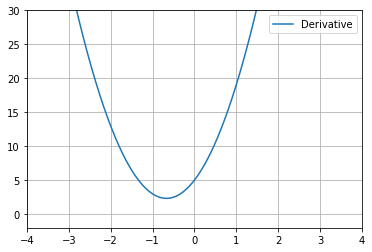

In [0]:
# PyTorchの微分グラフ
import numpy as np
import matplotlib.pyplot as plt

x = torch.arange(-4.0, 4.0, 0.001, requires_grad=True)
y = calc(x)
y.backward(gradient=torch.ones_like(y)) # スカラーテンソルの場合は勾配を格納する場所が必要なのでテンソルを仮生成【重要】
g = x.grad
x_numpy = x.detach().numpy()  # デタッチして（＝追跡しないようにして）からndarray化する
g_numpy = g.detach().numpy()
plt.plot(x_numpy, g_numpy, label = "Derivative")
plt.xlim(-4, 4)
plt.ylim(-2.0, 30.0)
plt.grid()
plt.legend()
plt.show()

## ■TensorFlow編

- データをTensorテンソル化して、勾配テープ（GradientTape）内で計算式を作る
- 勾配テープ（tape）の`gradient`メソッドで逆伝播する（自動微分）
- 逆伝播により計算された微分係数（＝勾配）が取得される

という流れで書けばよい。具体的には以下の通り。

In [0]:
import tensorflow as tf
import tensorflow.keras.layers as layers  # 「レイヤー」モジュールの別名定義

x = tf.Variable(0.5)
with tf.GradientTape() as tape:  # 計算式に対して「勾配計算が必要」とマーク
  y = calc(x)  # 既存の計算式から計算グラフを動的に構築
print(y)       # tf.Tensor(9.75, shape=(), dtype=float32) ……などと表示される

g = tape.gradient(y, x)   # 逆伝播の処理として、上記式から微分係数（＝勾配）を計算（自動微分：Autograd）
print(g)       # tf.Tensor(10.5, shape=(), dtype=float32)  ……などと表示される

tf.Tensor(9.75, shape=(), dtype=float32)
tf.Tensor(10.5, shape=(), dtype=float32)


### ●グラフを描画

先ほどは単一のスカラーだったので、今度は複数のスカラー値で計算してみる。

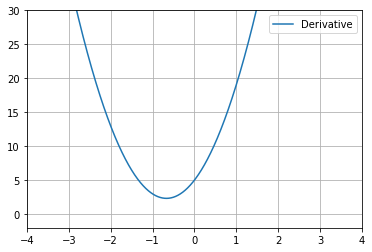

In [0]:
# TensorFlowの微分グラフ
import numpy as np
import matplotlib.pyplot as plt

x = tf.Variable(tf.range(-4.0, 4.0, 0.001), trainable=True)
with tf.GradientTape() as tape:
  #tape.watch(x) # tf.constantであえれば x を記録する（手動追跡）
  # ↑tf.Variableであれば既に訓練可能な状態（自動追跡）なので不要
  y = calc(x)
g = tape.gradient(y, x)
x_numpy = x.numpy()
g_numpy = g.numpy()
plt.plot(x_numpy, g_numpy, label = "Derivative")
plt.xlim(-4, 4)
plt.ylim(-2.0, 30.0)
plt.grid()
plt.legend()
plt.show()

# 簡単ですね。以上で終わりです。